In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from general_graph_utils_main import *

In [4]:
G, G_ud = random_graph_n(4)

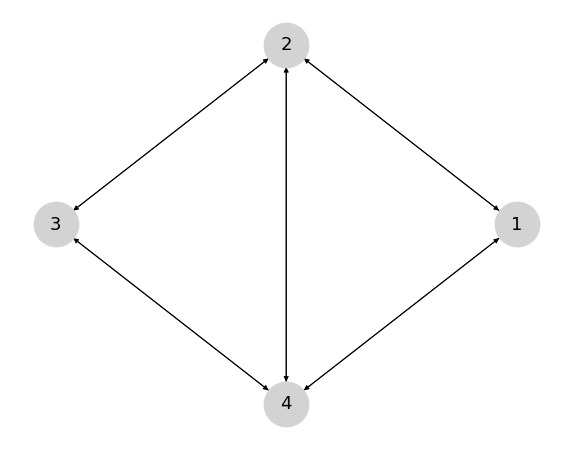

In [5]:
fig, ax = plt.subplots(figsize = (10, 8))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [6]:
node_list = get_nodes(G)
num_nodes = len(node_list)
edge_list = get_edges(G)
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)
label_dict, label_list = get_labels(G)

In [7]:
cycle_list

[[2, 4, 1], [2, 3, 4]]

In [8]:
print(label_dict)

{(1, 2): 0.01517, (1, 4): 0.00227, (2, 1): 0.2453, (2, 3): 7.29226, (2, 4): 2.26403, (3, 2): 16.39183, (3, 4): 0.01087, (4, 3): 0.00939, (4, 2): 5.66696, (4, 1): 0.003}


In [9]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [10]:
cycle_edges_backward

[[(4, 2), (1, 4), (2, 1)], [(3, 2), (4, 3), (2, 4)]]

In [11]:
cycle_edges_forward

[[(2, 4), (4, 1), (1, 2)], [(2, 3), (3, 4), (4, 2)]]

In [12]:
shared_cycle_edges_list,all_cycle_edges_forward = shared_edges_cycles(cycle_list,
                                                                      cycle_edges_forward,
                                                                      cycle_edges_backward)

In [13]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

In [15]:
cycle_labels_forward, edge_tracker, index_tracker = equilibrium_params(cycle_list,
                                                                       cycle_edges_forward,
                                                                       cycle_labels_forward,
                                                                       cycle_labels_backward,
                                                                       shared_cycle_edges_list)

Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: 0.0


Cycle 0 affinity after solve: -1.1102230246251565e-16
Cycle 1 affinity after solve: 0.0
Cycle 2 affinity after solve: 2.2204460492503128e-16


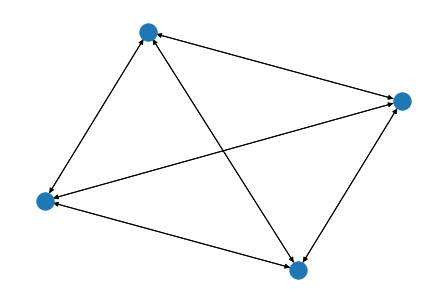

In [16]:
# cleaner workflow to test

G, G_ud = random_graph_n(4)
nx.draw(G)
cycles = get_cycles(G_ud)
ed_f, ed_b, lb_f, lb_b = get_cycle_labels_edges(cycles, get_labels(G)[0])
pf = calculate_cycle_products(lb_f, lb_b)[0]
pb = calculate_cycle_products(lb_f, lb_b)[1]
shared_edges, all_ed_f = shared_edges_cycles(cycles,
                                            ed_f,
                                            ed_b)
# Actually call your new function:
new_clf, tracker, idx = equilibrium_params(
    cycles, ed_f, lb_f, lb_b, shared_edges)
# Then recompute affinities to verify every cycle is ≈ 0.


In [17]:
# After equilibrium_params_2 has given you edge_tracker & index_tracker
edge_list = get_edges(G)               # list of (u, v) tuples
label_dict, _ = get_labels(G)          # original labels
# Update label_dict & build label_list in edge_list order:
label_dict, label_list = reformat_labels(
    edge_tracker,
    index_tracker,
    cycle_labels_forward,
    label_dict,
    edge_list
)

# Then build the Laplacian with the new labels:
node_list = get_nodes(G)
L = Laplacian_all(edge_list, label_list, node_list)


Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: -1.1102230246251565e-16
[[-3.39754200e+01  3.49362000e+00  3.04000000e-03  1.01034700e+01]
 [ 6.14600000e-02 -2.19297207e+01  0.00000000e+00  1.17480000e-01]
 [ 6.02113000e+00  0.00000000e+00 -4.12502130e+02  2.95941173e+05]
 [ 2.78928300e+01  1.84361007e+01  4.12499090e+02 -2.95951394e+05]]


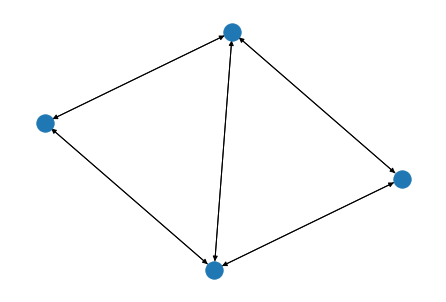

In [21]:
# Minimial complete workflow for debugging

# 1) Generate a reversible graph of size n
G, G_ud = random_graph_n(n=4)
nx.draw(G)

# 2) Extract nodes, edges, and initial labels
node_list      = get_nodes(G)                # e.g. [1,2,3,4]
edge_list      = get_edges(G)                # list of (u,v) tuples
label_dict, _  = get_labels(G)               # dict {(u,v): rate,…}
label_list     = np.array([ label_dict[e]     # aligned with edge_list
                          for e in edge_list ])

# 3) Get cycle structure and directed labels
cycle_list     = get_cycles(G_ud)
cef, ceb, clf, clb = get_cycle_labels_edges(cycle_list, label_dict)
shared_edges, _ = shared_edges_cycles(cycle_list, cef, ceb)

# 4) Zero out affinities
clf_new, edge_tracker, index_tracker = equilibrium_params(
    cycle_list, cef, clf, clb, shared_edges
)

# 5) Push new rates back into label_dict & rebuild label_list
label_dict, label_list = reformat_labels(
    edge_tracker,
    index_tracker,
    clf_new,
    label_dict,
    edge_list
)

# 6) Build the generator (Laplacian) with updated rates
L = Laplacian_all(edge_list, label_list, node_list)
print(L)